In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor,AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, mean_squared_error, mean_absolute_error,r2_score

In [2]:
train_set = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
test_set = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [3]:
columns_train = train_set.columns
columns_test = test_set.columns

In [4]:
train_set.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
train_set.nunique()

id                                 1117957
MonsoonIntensity                        17
TopographyDrainage                      19
RiverManagement                         17
Deforestation                           18
Urbanization                            18
ClimateChange                           18
DamsQuality                             17
Siltation                               17
AgriculturalPractices                   17
Encroachments                           19
IneffectiveDisasterPreparedness         17
DrainageSystems                         18
CoastalVulnerability                    18
Landslides                              17
Watersheds                              17
DeterioratingInfrastructure             18
PopulationScore                         19
WetlandLoss                             20
InadequatePlanning                      17
PoliticalFactors                        17
FloodProbability                        83
dtype: int64

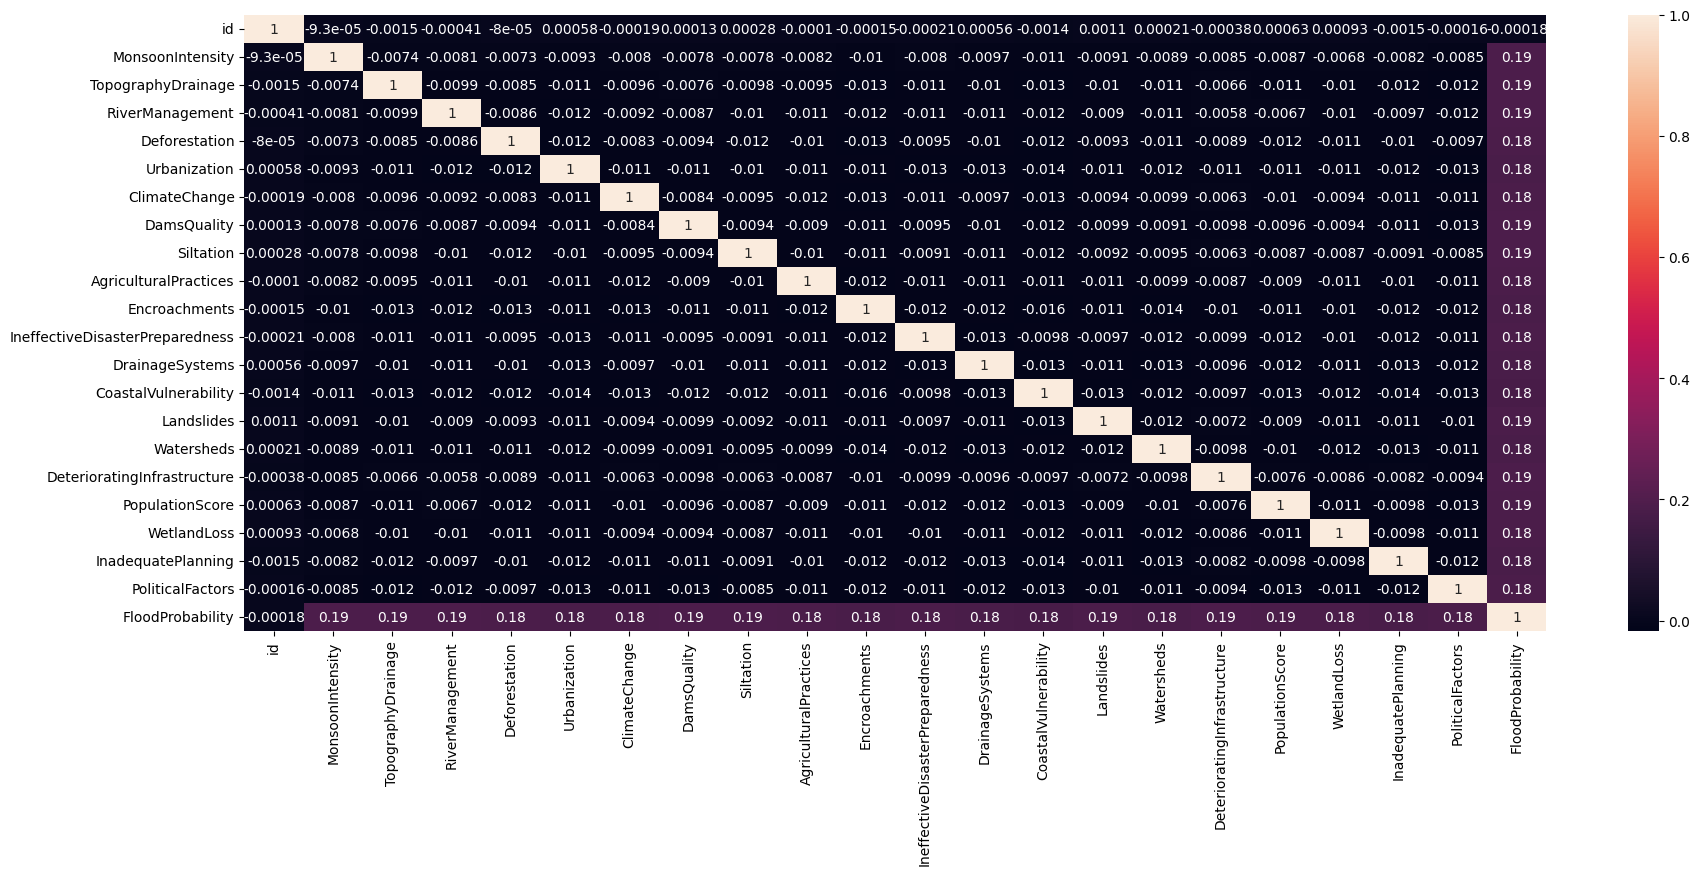

In [7]:
plt.figure(figsize=(21,8))
sns.heatmap(train_set.corr(), annot=True, )
plt.show()

In [8]:
X = pd.DataFrame(train_set.drop(columns="FloodProbability"), columns= columns_test)
y = train_set[["FloodProbability"]]

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
X_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
805665,805665,8,7,7,6,4,3,13,8,3,...,5,6,6,6,5,5,2,6,4,7
863045,863045,7,4,4,2,4,5,7,3,6,...,2,6,5,0,6,2,5,4,3,4
496045,496045,6,5,1,6,6,7,3,5,6,...,4,5,7,6,5,4,9,3,5,3
1079364,1079364,4,6,6,3,3,3,1,5,4,...,7,9,6,2,5,4,7,7,4,1
191800,191800,6,3,8,2,7,4,6,6,7,...,3,5,2,6,6,5,5,4,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,110268,4,7,5,4,4,5,3,8,4,...,5,2,7,3,7,6,2,4,5,5
259178,259178,3,4,6,5,5,7,6,8,2,...,3,7,3,7,9,7,3,2,3,8
131932,131932,5,4,1,2,3,4,6,8,3,...,3,4,5,3,4,5,3,6,7,7
671155,671155,6,10,4,6,3,6,3,3,5,...,5,3,6,6,5,5,4,4,5,5


In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [12]:
X_train = pd.DataFrame(X_train, columns= columns_test)
X_val = pd.DataFrame(X_val, columns= columns_test)

In [13]:
X = scaler.fit_transform(X)
test_set = scaler.transform(test_set)

In [14]:
X = pd.DataFrame(X, columns= columns_test)
test_set = pd.DataFrame(test_set, columns= columns_test)

In [15]:
linear = LinearRegression()

linear.fit(X_train,y_train)
print(f"Training score {linear.score(X_train,y_train)}")
y_pred = linear.predict(X_val)

Training score 0.8449678971530078


In [16]:
print(f"MSE: {mean_squared_error(y_val,y_pred)}")
print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
print(f"R2: {r2_score(y_val,y_pred)}")

MSE: 0.00040320653051216716
MAE: 0.015792470799283396
R2: 0.8448773580510154


In [17]:
SGD_model = SGDRegressor(learning_rate="constant")

SGD_model.fit(X_train,y_train)
print(f"Training score {SGD_model.score(X_train,y_train)}")
y_pred = SGD_model.predict(X_val)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training score 0.8268789550132348


In [18]:
print(f"MSE: {mean_squared_error(y_val,y_pred)}")
print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
print(f"R2: {r2_score(y_val,y_pred)}")

MSE: 0.000450553807387222
MAE: 0.016913323953206976
R2: 0.826661793266836


In [19]:
# distributions = dict(learning_rate = ['invscaling', "constant", "optimal","adaptive"],
#                     loss = ['squared_error',"huber", "epsilon_insensitive", "squared_epsilon_insensitive"])
# RG_CV = RandomizedSearchCV(SGD_model,distributions)

# RG_CV.fit(X_train,y_train)
# print(f"Training score {RG_CV.score(X_train,y_train)}")
# y_pred = RG_CV.predict(X_val)
# print(f"MSE: {mean_squared_error(y_val,y_pred)}")
# print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
# print(f"R2: {r2_score(y_val,y_pred)}")

In [20]:
# distributions = dict(learning_rate = ['invscaling', "constant", "optimal","adaptive"],
#                     loss = ['squared_error',"huber", "epsilon_insensitive", "squared_epsilon_insensitive"])
# GS_CV = GridSearchCV(SGD_model,distributions)

# GS_CV.fit(X_train,y_train)
# print(f"Training score {GS_CV.score(X_train,y_train)}")
# y_pred = GS_CV.predict(X_val)
# print(f"MSE: {mean_squared_error(y_val,y_pred)}")
# print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
# print(f"R2: {r2_score(y_val,y_pred)}")

In [21]:
# distributions = dict(learning_rate = ['invscaling', "constant", "optimal","adaptive"],
#                     loss = ['squared_error',"huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
#                     penalty=['l2', 'l1'])
# RG_CV = RandomizedSearchCV(SGD_model,distributions)

# RG_CV.fit(X_train,y_train)
# print(f"Training score {RG_CV.score(X_train,y_train)}")
# y_pred = RG_CV.predict(X_val)
# print(f"MSE: {mean_squared_error(y_val,y_pred)}")
# print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
# print(f"R2: {r2_score(y_val,y_pred)}")

In [22]:
# distributions = dict(learning_rate = ['invscaling', "constant", "optimal","adaptive"],
#                     loss = ['squared_error',"huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
#                      penalty=['l2', 'l1'])
# GS_CV = GridSearchCV(SGD_model,distributions)

# GS_CV.fit(X_train,y_train)
# print(f"Training score {GS_CV.score(X_train,y_train)}")
# y_pred = GS_CV.predict(X_val)
# print(f"MSE: {mean_squared_error(y_val,y_pred)}")
# print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
# print(f"R2: {r2_score(y_val,y_pred)}")

In [23]:
# lr_model = LogisticRegression()

# distributions = dict(C = [1.0, 0.5, 1.5, 2.0],
#                      max_iter=[100,200,500],
#                      penalty=['l2'])

# GS_CV = GridSearchCV(lr_model,distributions)

# GS_CV.fit(X_train,y_train)
# print(f"Training score {GS_CV.score(X_train,y_train)}")
# y_pred = GS_CV.predict(X_val)
# print(f"MSE: {mean_squared_error(y_val,y_pred)}")
# print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
# print(f"R2: {r2_score(y_val,y_pred)}")

In [24]:
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_val)
print(f"Training score {xg_model.score(X_train,y_train)}")
print(f"MSE: {mean_squared_error(y_val,y_pred)}")
print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
print(f"R2: {r2_score(y_val,y_pred)}")

Training score 0.8179468193290642
MSE: 0.0004976185148410598
MAE: 0.017613571099852995
R2: 0.8085549393090847


In [25]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_val)
print(f"Training score {cat_model.score(X_train,y_train)}")
print(f"MSE: {mean_squared_error(y_val,y_pred)}")
print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
print(f"R2: {r2_score(y_val,y_pred)}")

Learning rate set to 0.119817
0:	learn: 0.0501810	total: 212ms	remaining: 3m 31s
1:	learn: 0.0493271	total: 354ms	remaining: 2m 56s
2:	learn: 0.0484614	total: 497ms	remaining: 2m 45s
3:	learn: 0.0476903	total: 631ms	remaining: 2m 37s
4:	learn: 0.0469429	total: 761ms	remaining: 2m 31s
5:	learn: 0.0462105	total: 892ms	remaining: 2m 27s
6:	learn: 0.0455124	total: 1.02s	remaining: 2m 25s
7:	learn: 0.0448630	total: 1.16s	remaining: 2m 23s
8:	learn: 0.0442164	total: 1.29s	remaining: 2m 21s
9:	learn: 0.0435816	total: 1.42s	remaining: 2m 20s
10:	learn: 0.0430104	total: 1.54s	remaining: 2m 18s
11:	learn: 0.0424470	total: 1.66s	remaining: 2m 16s
12:	learn: 0.0418908	total: 1.79s	remaining: 2m 15s
13:	learn: 0.0413413	total: 1.9s	remaining: 2m 13s
14:	learn: 0.0408236	total: 2.02s	remaining: 2m 12s
15:	learn: 0.0403011	total: 2.15s	remaining: 2m 11s
16:	learn: 0.0397960	total: 2.26s	remaining: 2m 10s
17:	learn: 0.0393228	total: 2.37s	remaining: 2m 9s
18:	learn: 0.0388553	total: 2.48s	remaining: 2

In [26]:
lg_model = LGBMRegressor()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_val)
print(f"Training score {lg_model.score(X_train,y_train)}")
print(f"MSE: {mean_squared_error(y_val,y_pred)}")
print(f"MAE: {mean_absolute_error(y_val,y_pred)}")
print(f"R2: {r2_score(y_val,y_pred)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
Training score 0.7722033445629952
MSE: 0.0006090974999186309
MAE: 0.020145180138043697
R2: 0.7656664606302841


### OG test

In [27]:
final_model = CatBoostRegressor()
final_model.fit(X, y)

y_pred = cat_model.predict(test_set)
print(f"Training score {cat_model.score(X,y)}")

Learning rate set to 0.124117
0:	learn: 0.0501414	total: 187ms	remaining: 3m 6s
1:	learn: 0.0492525	total: 364ms	remaining: 3m 1s
2:	learn: 0.0483635	total: 537ms	remaining: 2m 58s
3:	learn: 0.0475592	total: 701ms	remaining: 2m 54s
4:	learn: 0.0468015	total: 865ms	remaining: 2m 52s
5:	learn: 0.0460410	total: 1.03s	remaining: 2m 49s
6:	learn: 0.0453210	total: 1.19s	remaining: 2m 49s
7:	learn: 0.0446598	total: 1.36s	remaining: 2m 48s
8:	learn: 0.0440021	total: 1.51s	remaining: 2m 46s
9:	learn: 0.0433472	total: 1.68s	remaining: 2m 46s
10:	learn: 0.0427642	total: 1.84s	remaining: 2m 45s
11:	learn: 0.0421815	total: 1.98s	remaining: 2m 43s
12:	learn: 0.0416139	total: 2.13s	remaining: 2m 41s
13:	learn: 0.0410604	total: 2.27s	remaining: 2m 39s
14:	learn: 0.0405333	total: 2.42s	remaining: 2m 39s
15:	learn: 0.0400003	total: 2.57s	remaining: 2m 38s
16:	learn: 0.0394883	total: 2.72s	remaining: 2m 37s
17:	learn: 0.0390057	total: 2.86s	remaining: 2m 36s
18:	learn: 0.0385288	total: 3s	remaining: 2m 3

In [28]:
output = test_set[["id"]]
output

,id
0,1.732052
1,1.732055
2,1.732059
3,1.732062
4,1.732065
...,...
745300,4.041439
745301,4.041442
745302,4.041445
745303,4.041448


In [29]:
output["FloodProbability"]=pd.DataFrame(y_pred)

/tmp/ipykernel_33/810067823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["FloodProbability"]=pd.DataFrame(y_pred)


In [30]:
output["id"] = test_set["id"]

/tmp/ipykernel_33/376173599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["id"] = test_set["id"]


In [31]:
output

,id,FloodProbability
0,1.732052,0.573868
1,1.732055,0.456281
2,1.732059,0.457298
3,1.732062,0.465958
4,1.732065,0.466488
...,...,...
745300,4.041439,0.478688
745301,4.041442,0.451958
745302,4.041445,0.627065
745303,4.041448,0.551482


In [32]:
output.to_csv("output.csv")

In [33]:
output = pd.read_csv("/kaggle/working/output.csv")

In [34]:
output.columns

Index(['Unnamed: 0', 'id', 'FloodProbability'], dtype='object')

In [35]:
output = output.drop(columns="Unnamed: 0")

In [36]:
output

,id,FloodProbability
0,1.732052,0.573868
1,1.732055,0.456281
2,1.732059,0.457298
3,1.732062,0.465958
4,1.732065,0.466488
...,...,...
745300,4.041439,0.478688
745301,4.041442,0.451958
745302,4.041445,0.627065
745303,4.041448,0.551482


In [37]:
output

,id,FloodProbability
0,1.732052,0.573868
1,1.732055,0.456281
2,1.732059,0.457298
3,1.732062,0.465958
4,1.732065,0.466488
...,...,...
745300,4.041439,0.478688
745301,4.041442,0.451958
745302,4.041445,0.627065
745303,4.041448,0.551482


In [38]:
output.to_csv("output1.csv")

In [39]:
output = pd.read_csv("/kaggle/working/output1.csv")

In [40]:
output = output[["id","FloodProbability"]]

In [42]:
output.set_index("id")

,FloodProbability
id,
1.732052,0.573868
1.732055,0.456281
1.732059,0.457298
1.732062,0.465958
1.732065,0.466488
...,...
4.041439,0.478688
4.041442,0.451958
4.041445,0.627065


In [43]:
output.to_csv("FloodProbability_output.csv")